# Linear Regression for Insurance Charges Prediction

This notebook demonstrates how to build a linear regression model to predict insurance charges based on various features of a patient.

## 1. Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

## 2. Load and Preprocess Data

In [9]:
# Load the dataset from a local CSV file
df = pd.read_csv("../../artifacts/row_data/structure_data/insurance.csv")

# Drop the 'region' column as it is not needed for this model
df = df.drop(['region'] ,axis= 1 )

# Convert categorical features to numerical
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Check for any null values
print("Null values check:")
print(df.isna().sum())

# Display the first few rows of the dataframe
df.head()

Null values check:
age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


## 3. Exploratory Data Analysis (EDA)

Dataframe shape: (1338, 6)
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB
Dataframe description:
               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000   

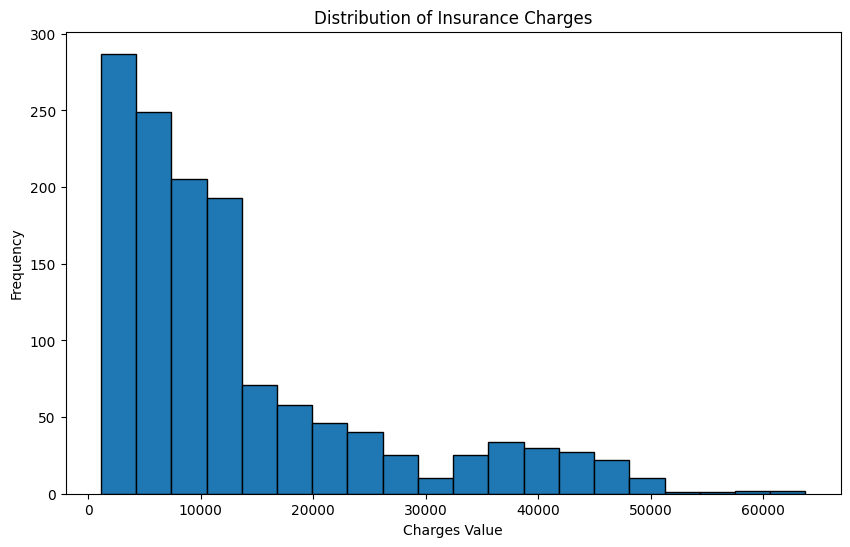

In [10]:
# Get information about the data
print("Dataframe shape:", df.shape)
print("Dataframe info:")
df.info()
print("Dataframe description:")
print(df.describe())

# Plot the distribution of charges
plt.figure(figsize=(10, 6))
plt.hist(df['charges'], bins=20 ,edgecolor='black')
plt.xlabel('Charges Value')
plt.ylabel('Frequency')
plt.title('Distribution of Insurance Charges')
plt.show()

## 4. Outlier Removal

In [11]:
# Remove outliers using the IQR method
q1 = df['charges'].quantile(q=0.25)
q3 = df['charges'].quantile(q=0.75)
iqr = q3 - q1
min_val = q1 - 1.5 * iqr
max_val = q3 + 2.5 * iqr

print(f"Original shape: {df.shape}")

# Filter the dataframe to remove outliers
df = df[(df['charges'] >= min_val) & (df['charges'] <= max_val)]

print(f"Shape after removing outliers: {df.shape}")

Original shape: (1338, 6)
Shape after removing outliers: (1309, 6)


## 5. Model Training

In [12]:
# Split data into features (X) and target (y)
y = df['charges']
X = df.drop('charges', axis = 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=10)

# Apply the linear regression model
linr = LinearRegression()
linr.fit(X_train, y_train)

# Make predictions on the test set
y_predict = linr.predict(X_test)

## 6. Model Evaluation

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 30480142.757500775
Mean Absolute Error: 3863.7773847961544
R2 Score: 0.7606309440800537
Root Mean Squared Error: 5520.88242561828


## 7. Visualization of Results

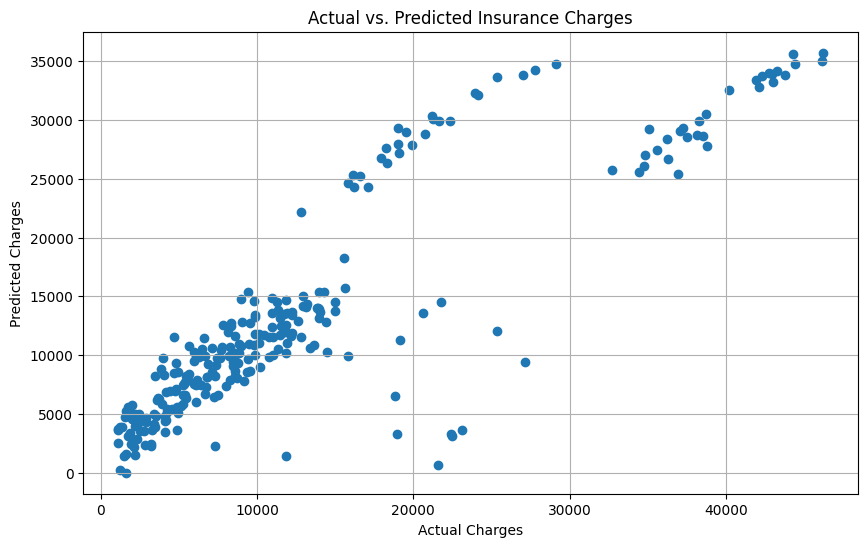

In [14]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict)
plt.grid()
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Insurance Charges')
plt.show()

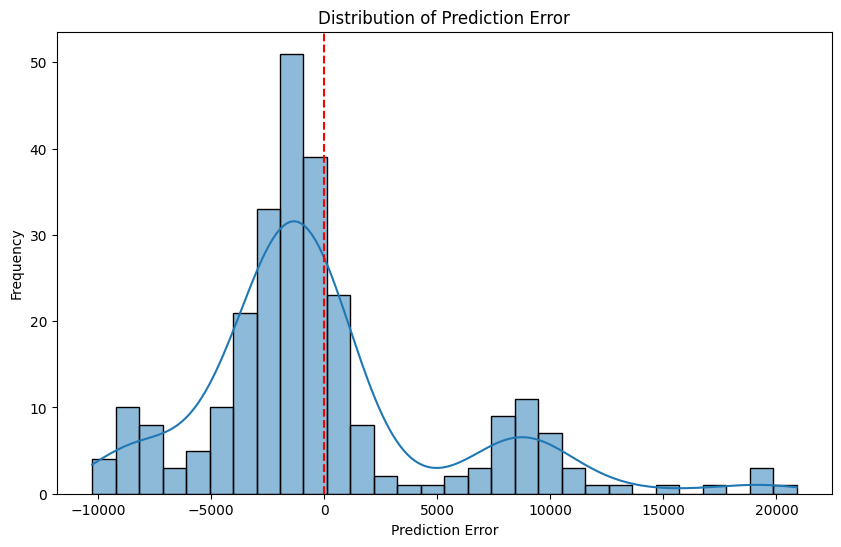

In [15]:
# Plot the distribution of the prediction error
the_error = y_test - y_predict
plt.figure(figsize=(10, 6))
sns.histplot(the_error, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Error')
plt.show()